# Classification Task

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', as_frame=True)
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X = np.array(mnist.data)
y= np.array(mnist.target)

In [5]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


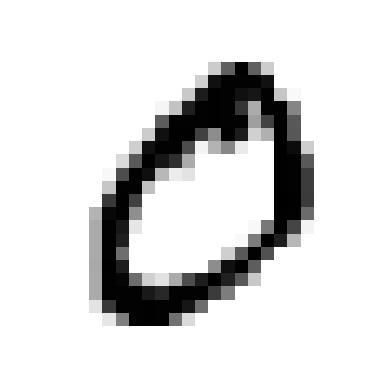

In [66]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[1]
plot_digit(some_digit)
plt.show()

In [8]:
some_digit.shape

(784,)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [72]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [73]:
y_train_class0 = (y_train == '0')
y_test_class0 = (y_test == '0')

In [74]:
from sklearn.linear_model import SGDClassifier

In [75]:
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_class0)

SGDClassifier(random_state=42)

In [76]:
sgd_classifier.predict(some_digit.reshape(1,-1))

array([ True])

In [77]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_classifier, X_train, y_train_class0, cv=3)

array([0.9854, 0.9847, 0.9865])

In [78]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_class0, cv=3)
y_train_pred.shape

(60000,)

In [79]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_class0, y_train_pred)
cm

array([[53486,   591],
       [  277,  5646]])

In [80]:
from sklearn.metrics import precision_score, recall_score

print("Precision score: " + str(precision_score(y_train_class0, y_train_pred)))
print("Recall score: " + str(recall_score(y_train_class0, y_train_pred)))

Precision score: 0.9052429052429053
Recall score: 0.9532331588721932


In [81]:
cm[1,1]/(cm[1,1] + cm[1,0])

0.9532331588721932

In [82]:
from sklearn.metrics import f1_score

f1_score(y_train_class0, y_train_pred)

0.9286184210526315

In [83]:
some_digit.shape

(784,)

In [84]:
sgd_classifier.decision_function(some_digit.reshape(1,-1))

array([21180.55082734])

In [85]:
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_class0, method='decision_function', cv=3)

In [86]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_class0, y_train_pred)

Recalls and thresholds return an array with one more value than thresholds

In [87]:
threshold = 20000

In [88]:
idx_for_90_precision = (precisions >= 0.90).argmax()

In [89]:
idx_for_90_precision

53716

In [90]:
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

-411.00569077524983

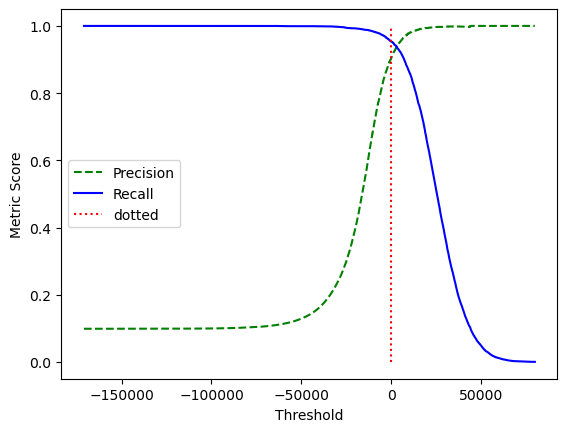

In [91]:
plt.clf()
plt.plot(thresholds, precisions[:-1], "g--", label="Precision")
plt.plot(thresholds, recalls[:-1], "b-", label= "Recall")
plt.vlines(threshold_for_90_precision, 0, 1.0, "r", "dotted", label="dotted")
plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.legend()
plt.show()

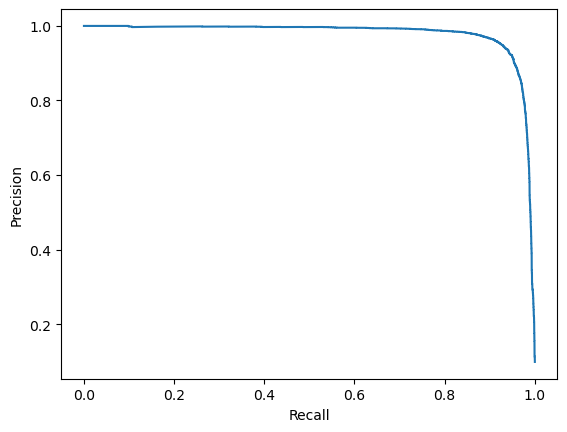

In [92]:
plt.clf()
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [93]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_class0, y_train_pred)

In [94]:
idx_threshold_90p = (thresholds <= threshold).argmax()
fpr_at_threshold_90 = fpr[idx_threshold_90p]
tpr_at_threshold_90 = tpr[idx_threshold_90p]

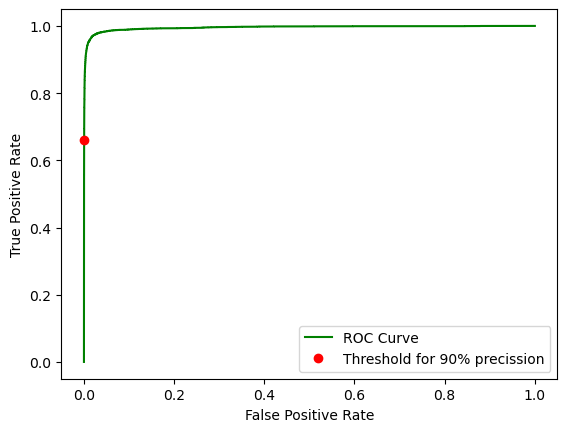

In [95]:
plt.clf()
plt.plot(fpr, tpr, "g-", label="ROC Curve")
plt.plot([fpr_at_threshold_90], [tpr_at_threshold_90], "ro", label="Threshold for 90% precission")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [96]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_class0, y_train_pred)

0.9951089652363219

In [97]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [98]:
forst_predict_prob = cross_val_predict(forest_clf, X_train, y_train_class0, cv=3, method="predict_proba")

In [99]:
forst_predict_prob[-7:-5]

array([[1., 0.],
       [1., 0.]])

In [100]:
y_scores_forest = forst_predict_prob[:,1]
precision_forest, recall_forest, thresholds_forest = precision_recall_curve(y_train_class0, y_scores_forest)

[]

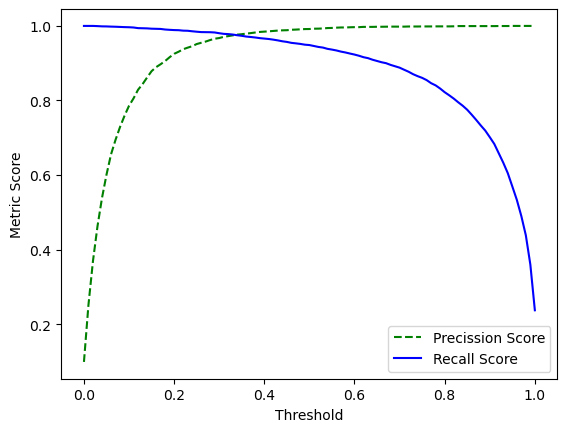

In [101]:
plt.clf()
plt.plot(thresholds_forest, precision_forest[:-1], "g--", label="Precission Score")
plt.plot(thresholds_forest, recall_forest[:-1], "b-", label="Recall Score")
plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.legend()
plt.plot()

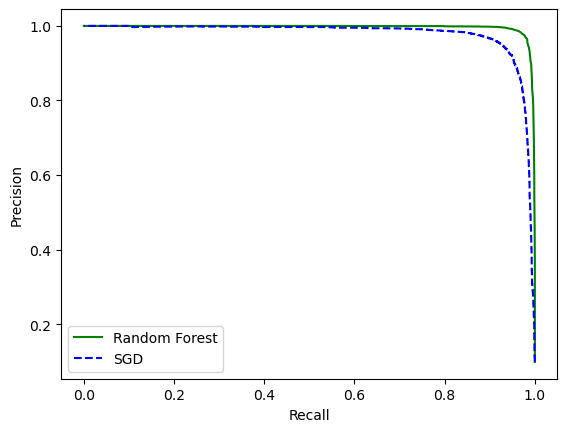

In [102]:
plt.clf()
plt.plot(recall_forest, precision_forest, "g-", label="Random Forest")
plt.plot(recalls, precisions, "b--", label="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

## Multiclass Classification with Binary Classifiers
### One-versus-one

In [103]:
from sklearn.svm import SVC

In [104]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [105]:
svm_clf.predict([X_train[0]])

array(['5'], dtype=object)

In [106]:
first_digit_score = svm_clf.decision_function(X_train[0].reshape(1,-1))

In [107]:
first_digit_score

array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

In [108]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

### One-versus-rest

In [109]:
from sklearn.multiclass import OneVsRestClassifier

In [110]:
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [111]:
ovr_clf.predict(X_train[0].reshape(1,-1))

array(['5'], dtype='<U1')

In [112]:
first_digit_score = ovr_clf.decision_function(X_train[0].reshape(1,-1))
first_digit_score

array([[-1.32802451, -1.79073853, -1.39262214, -0.94416346, -2.29003973,
         0.80921042, -1.72304481, -1.20954271, -1.63739176, -1.79246052]])

In [113]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train[:2000], y_train[:2000])

SGDClassifier(random_state=42)

In [114]:
first_digit_score = sgd_clf.decision_function(X_train[0].reshape(1,-1))
first_digit_score

array([[-1704540.26918897, -1683382.42678916, -2594122.50571131,
         -145667.7337014 , -3270741.36924448,    -4883.95058744,
        -3420127.24409032, -1846510.16554943, -1328858.01006284,
        -2043246.17459117]])

In [116]:
y_train[0]

'5'

In [117]:
cross_val_score(sgd_clf, X_train, y_train, scoring="accuracy", cv=3)

array([0.87365, 0.85835, 0.8689 ])

In [120]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)

In [123]:
cross_val_score(sgd_clf, X_train_scaled, y_train, scoring="accuracy", cv=3)

KeyboardInterrupt: 